### 2DO Parcial - Nava Siñani Kelvin Jherman
Crrera: Ing. de Sistemas
Apredizaje no supervisado

DataSet:Flight Price Prediction
URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

GitHub: https://github.com/Kel-340/InteligenciaArtificial

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [67]:
# Cargar el nuevo conjunto de datos
df = pd.read_csv('/content/drive/MyDrive/Clean_Dataset.csv')
df = df.drop(df.columns[0], axis=1)

diccionario = {"Vistara": 0, "Air_India": 1, "Indigo": 2, "GO_FIRST": 3, "AirAsia": 4, "SpiceJet": 5}
df["airline"] = df["airline"].replace(diccionario)

diccionario1 = {"Delhi": 0, "Mumbai": 1, "Bangalore": 2, "Kolkata": 3, "Hyderabad": 4, "Chennai": 5}
df["source_city"] = df["source_city"].replace(diccionario1)

diccionario2 = {"Morning": 0, "Early_Morning": 1, "Evening": 2, "Night": 3, "Afternoon": 4, "Late_Night": 5}
df["departure_time"] = df["departure_time"].replace(diccionario2)

diccionario3 = {"Mumbai": 0, "Delhi": 1, "Bangalore": 2, "Kolkata": 3, "Hyderabad": 4, "Chennai": 5}
df["destination_city"] = df["destination_city"].replace(diccionario3)

diccionario4 = {"Economy": 0, "Business": 1}
df["class"] = df["class"].replace(diccionario4)

diccionario5 = {"zero": 0, "one": 1, "two_or_more": 2}
df["stops"] = df["stops"].replace(diccionario5)

diccionario6 = {"Morning": 0, "Early_Morning": 1, "Evening": 2, "Night": 3, "Afternoon": 4, "Late_Night": 5}
df["arrival_time"] = df["arrival_time"].replace(diccionario6)

df = df.drop("flight", axis=1)

# Seleccionar las características (features) y la variable objetivo (target)
X_train = df.iloc[:50000, df.columns != "price"]
y_train = df.iloc[:50000, df.columns.get_loc("price")]

X = X_train


print(X.shape)
print(X_train.shape)

print(X)

# Number of clusters for K-Means
k = 50

(50000, 9)
(50000, 9)
       airline  source_city  departure_time  stops  arrival_time  \
0            5            0               2      0             3   
1            5            0               1      0             0   
2            4            0               1      0             1   
3            0            0               0      0             4   
4            0            0               0      0             0   
...        ...          ...             ...    ...           ...   
49995        0            1               0      1             4   
49996        0            1               1      1             4   
49997        0            1               1      1             4   
49998        0            1               2      1             3   
49999        0            1               0      1             3   

       destination_city  class  duration  days_left  
0                     0      0      2.17          1  
1                     0      0      2.33          1  

In [57]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_n=X_scaled
# Verificar las dimensiones de los datos
print(X.shape)
print(X_scaled.shape)

(50000, 9)
(50000, 9)


In [26]:
# Importa la clase KMeans del módulo de clustering de scikit-learn
from sklearn.cluster import KMeans

# Crea una instancia de KMeans con el número de clusters especificado por la variable k y establece la semilla aleatoria en 42 para reproducibilidad.
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajusta el modelo KMeans a los datos escalados X_scaled. Esto significa que el algoritmo intentará agrupar los datos en 'k' grupos basados en la similitud de las características.
kmeans.fit(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50, random_state=42)

In [27]:


# Crea una instancia de KMeans con el número de clusters especificado por la variable k y establece la semilla aleatoria en 42 para reproducibilidad.
kmeans = KMeans(n_clusters=k, random_state=42)

# Calcula la distancia de cada punto en X al centroide de su clúster asignado.
X_digits_dist = kmeans.fit_transform(X)

# Importa la función silhouette_score desde scikit-learn, la cual se utiliza para calcular el coeficiente de silueta
from sklearn.metrics import silhouette_score

# Calcula el coeficiente de silueta para los datos X y las etiquetas de los clústeres asignadas por kmeans
silhouette_score(X, kmeans.labels_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.15855877102236576

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

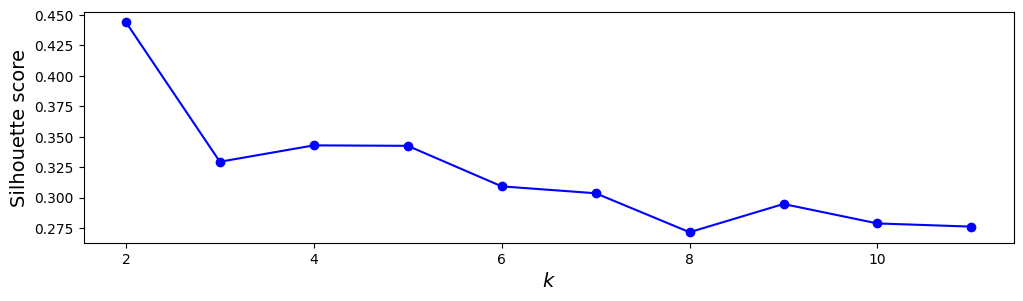

In [28]:
# Crea una lista kmeans_per_k que contendrá modelos KMeans ajustados para diferentes valores de k, desde 1 hasta 11 (exclusivo).
# Se utiliza una comprensión de lista para iterar sobre los valores de k.
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 12)]

# Calcula el coeficiente de silueta para cada modelo en kmeans_per_k, excepto el primero (k=1), ya que el coeficiente de silueta no se define para un solo clúster.
# Se utiliza una comprensión de lista para iterar sobre los modelos y calcular el coeficiente de silueta para cada uno.
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

# Importa la biblioteca matplotlib.pyplot para trazar el gráfico.
import matplotlib.pyplot as plt

# Crea una figura con un tamaño específico para el gráfico.
plt.figure(figsize=(12, 3))

# Traza la relación entre el número de clústeres (k) en el eje x y el coeficiente de silueta en el eje y.
# Se utiliza 'bo-' para representar puntos azules y líneas sólidas que conectan los puntos.
plt.plot(range(2, 12), silhouette_scores, "bo-")

# Etiqueta el eje x como 'k' (número de clústeres) y el eje y como 'Silhouette score' (coeficiente de silueta).
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Muestra el gráfico.
plt.show()

In [33]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

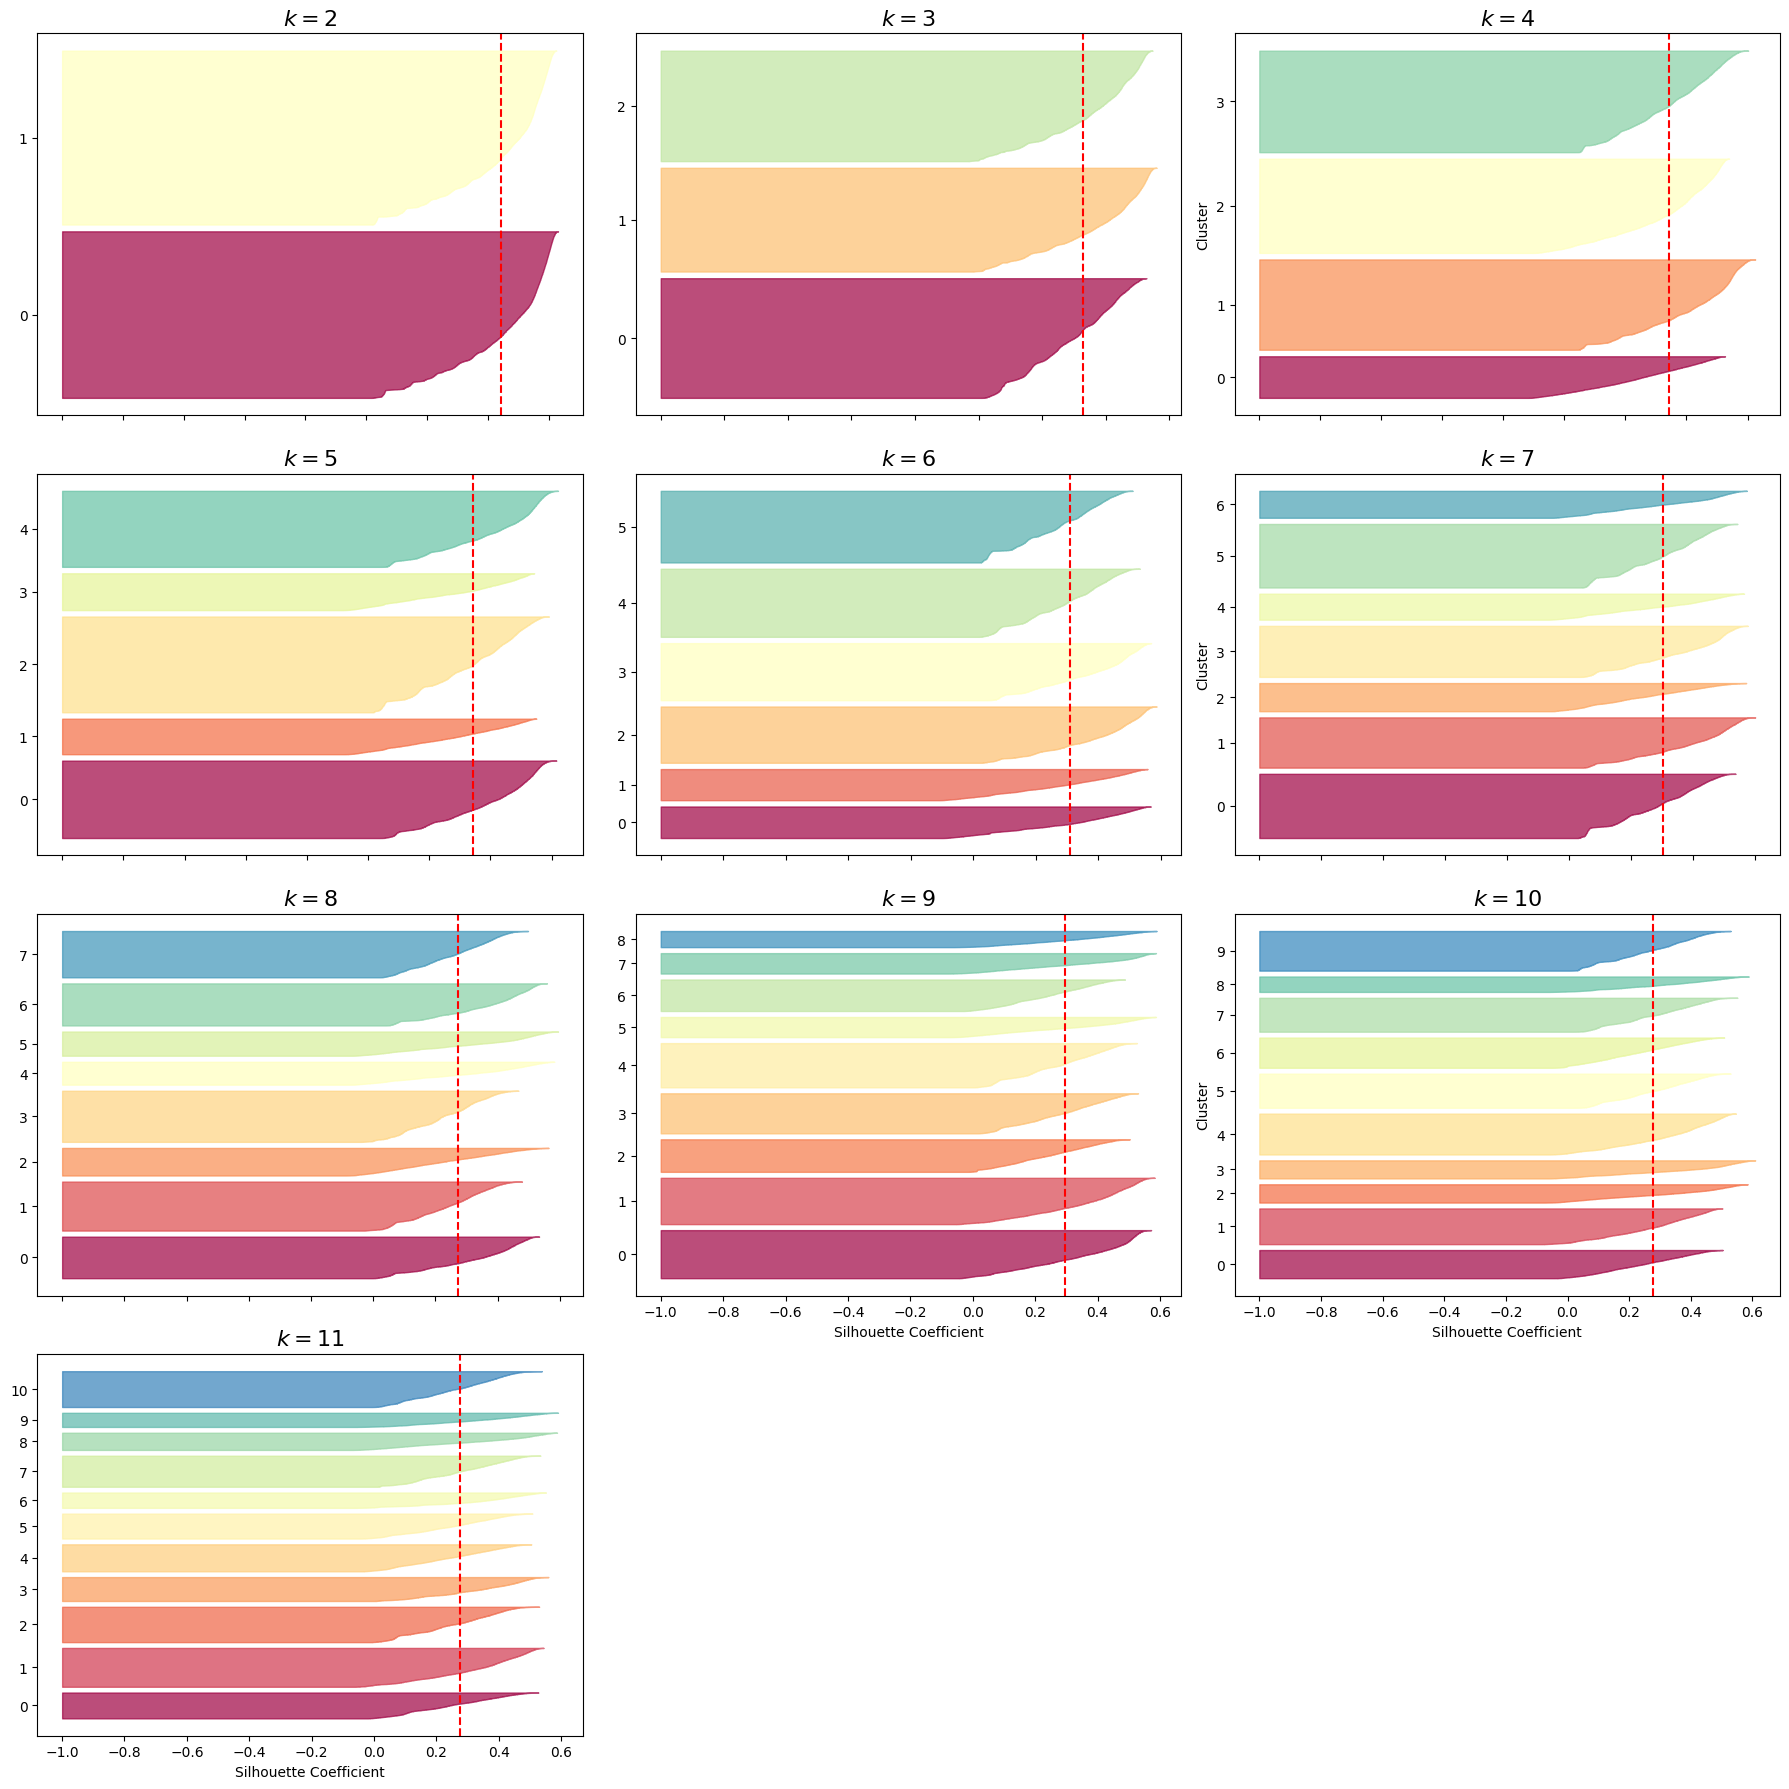

In [36]:
plt.figure(figsize=(18, 18))

# Ajustar el número de filas y columnas para que se ajusten todos los subgráficos
n_rows = 4
n_cols = 3

for k in range(2, 12):
    plt.subplot(n_rows, n_cols, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 50
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), -1, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k % n_cols == 1:
        plt.ylabel("Cluster")

    if k > 8:
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

In [38]:
from sklearn.cluster import KMeans

# Número de clusters para el aprendizaje activo
k = 50

# Inicializar el modelo de clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

In [59]:
# Calcular las distancias a los centroides y obtener ejemplos representativos
X_train_values = X_train_n # Convertir el DataFrame de entrenamiento normalizado a un array numpy
X_train_dist = kmeans.fit_transform(X_train_values)  # Calcular las distancias a los centroides
idxs = np.argmin(X_train_dist, axis=0)  # Obtener los índices de los ejemplos más cercanos a cada centroide
X_representative_examples = X_train_values[idxs]  # Obtener los ejemplos representativos

# Imprimir la forma de los ejemplos representativos
print("Forma de los ejemplos representativos:", X_representative_examples.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Forma de los ejemplos representativos: (50, 9)


In [60]:
from sklearn.linear_model import LogisticRegression

# Inicializar un modelo de regresión logística
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Obtener las etiquetas correspondientes a los ejemplos representativos
y_train_values = y_train.values
y_representative_examples = y_train_values[idxs]

# Entrenar el modelo de regresión logística con los ejemplos representativos y sus etiquetas
log_reg.fit(X_representative_examples, y_representative_examples)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [64]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para el conjunto de prueba utilizando el modelo entrenado
y_pred_test = log_reg.predict(X_train_n)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_train, y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy)



Precisión del modelo en el conjunto de prueba: 0.05476


In [71]:
# Obtener las probabilidades de predicción para los ejemplos en el conjunto de prueba (ya lo hicimos con y_pred_test)
probas = log_reg.predict_proba(X_train_n)

# Seleccionar ejemplos inciertos basados en las probabilidades de predicción
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels) #ordenar de menor a mayor probabilidad
X_lowest = X_train_n[sorted_ixs[:k]]
y_lowest = y_train.values[sorted_ixs[:k]]

# Actualizar las etiquetas de los ejemplos inciertos en el conjunto de prueba
y_train_active = y_train.copy()
y_train_active[sorted_ixs[:k]] = y_lowest

# Entrenar un nuevo modelo de regresión logística con las etiquetas actualizadas en el conjunto de prueba
log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg_active.fit(X_train_n, y_train_active)

# Evaluar la precisión del modelo de aprendizaje activo en el conjunto de prueba
accuracy_active = log_reg_active.score(X_train_n, y_train)
print(f"Precisión del modelo de aprendizaje activo (1ra repetición): {accuracy_active:.4f}")
# Mostrar los datos de y_train
print("Datos de y_train:", y_train.values)

Precisión del modelo de aprendizaje activo (1ra repetición): 0.2973
Datos de y_train: [5953 5953 5956 ... 5232 5232 5343]
